### Data quality is depending on multiple factors like missing values, outliers, sparsity. - Check relevant data quality 

In [1]:
import pandas as pd

# Load the Excel file
file_path = 'Presentation - omics challenge Data.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# 1. Check for Missing Values
missing_values = df.isnull().sum()
total_missing = missing_values.sum()

# Display columns with missing values
missing_columns = missing_values[missing_values > 0]

# 2. Check for Duplicate Rows
duplicate_rows = df.duplicated().sum()

# 3. Check Data Types
data_types = df.dtypes

# 4. Get Statistical Summaries
stat_summary = df.describe()

# 5. Consistency Checks (example: checking for any non-numeric values in numeric columns)
non_numeric = df.select_dtypes(include=['object']).apply(lambda x: pd.to_numeric(x, errors='coerce').isna().sum())

# 6. Calculate Sparsity
total_elements = df.size
sparsity = total_missing / total_elements * 100

# Print Results
print("Missing Values:\n", missing_columns)
print("\nTotal Missing Values:", total_missing)
print("\nDuplicate Rows:", duplicate_rows)
print("\nData Types:\n", data_types)
print("\nStatistical Summary:\n", stat_summary)
print("\nNon-Numeric Values in Numeric Columns:\n", non_numeric)
print(f"\nSparsity of the dataset: {sparsity:.2f}%")


C:\Users\Sudeep\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Missing Values:
 Series([], dtype: int64)

Total Missing Values: 0

Duplicate Rows: 0

Data Types:
 Unnamed: 0      object
Unnamed: 1      object
Amino acid      object
Unnamed: 3      object
Unnamed: 4      object
                 ...  
Unnamed: 517    object
Unnamed: 518    object
Unnamed: 519    object
Unnamed: 520    object
Unnamed: 521    object
Length: 522, dtype: object

Statistical Summary:
        Unnamed: 0 Unnamed: 1  Amino acid   Unnamed: 3  Unnamed: 4  Unnamed: 5  \
count          25         25           25          25          25          25   
unique         25          3           12          24          24          24   
top       Sample     Control           12         318         165         276   
freq            1         12            4           2           2           2   

           Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  Unnamed: 512  \
count              25          25          25          25  ...            25   
unique             25          

In [6]:
import pandas as pd
from scipy import stats
import numpy as np

# Load the Excel file
file_path = 'Presentation - omics challenge Data.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Extract numerical data only for Z-score analysis (excluding first row of labels)
numeric_data = df.iloc[1:, 2:].apply(pd.to_numeric, errors='coerce')  # Convert to numeric, ignore errors
numeric_data = numeric_data.dropna(axis=1, how='all')  # Drop columns with all NaN values

# Calculate the Z-scores for the dataset
z_scores = np.abs(stats.zscore(numeric_data, nan_policy='omit'))

# Identify outliers (Z-score > 3 is a common threshold for outliers)
outliers = np.where(z_scores > 3)

# Output the indices of the outliers
outlier_indices = list(zip(outliers[0], outliers[1]))
outlier_indices, len(outlier_indices)  # Displaying the outlier indices and the count of outliers


([(0, 150),
  (0, 258),
  (0, 276),
  (0, 352),
  (0, 497),
  (1, 31),
  (1, 68),
  (1, 89),
  (1, 125),
  (1, 143),
  (1, 146),
  (1, 305),
  (1, 310),
  (1, 316),
  (1, 410),
  (2, 259),
  (2, 387),
  (2, 499),
  (3, 51),
  (3, 119),
  (3, 204),
  (3, 254),
  (3, 260),
  (3, 311),
  (3, 388),
  (4, 66),
  (4, 76),
  (4, 166),
  (4, 175),
  (4, 185),
  (4, 192),
  (4, 205),
  (4, 206),
  (4, 211),
  (4, 217),
  (4, 218),
  (4, 222),
  (4, 228),
  (4, 232),
  (4, 239),
  (4, 241),
  (4, 242),
  (4, 244),
  (4, 265),
  (4, 266),
  (4, 269),
  (4, 277),
  (4, 291),
  (4, 300),
  (4, 307),
  (4, 309),
  (4, 313),
  (4, 314),
  (4, 315),
  (4, 318),
  (4, 319),
  (4, 326),
  (4, 333),
  (4, 339),
  (4, 341),
  (4, 342),
  (4, 345),
  (4, 351),
  (4, 358),
  (4, 368),
  (4, 374),
  (4, 378),
  (4, 379),
  (4, 380),
  (4, 381),
  (4, 382),
  (4, 385),
  (4, 389),
  (4, 392),
  (4, 397),
  (4, 399),
  (4, 400),
  (4, 401),
  (4, 402),
  (4, 411),
  (4, 412),
  (4, 416),
  (4, 419),
  (4, 423)

### Box plots can visually show the distribution of data and highlight any outliers.

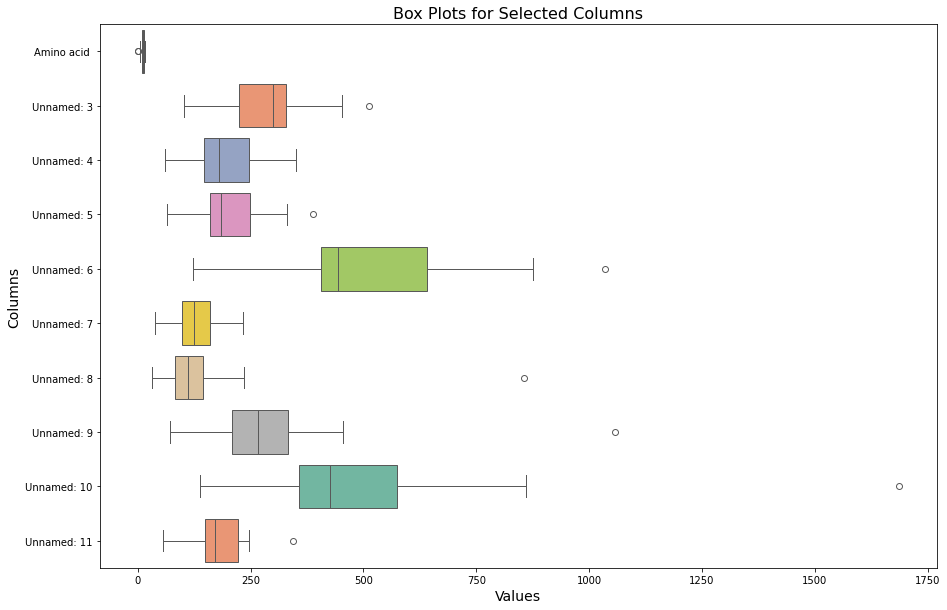

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = 'Presentation - omics challenge Data.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Extract numerical data only (excluding first row of labels)
numeric_data = df.iloc[1:, 2:].apply(pd.to_numeric, errors='coerce')  # Convert to numeric, ignore errors
numeric_data = numeric_data.dropna(axis=1, how='all')  # Drop columns with all NaN values

# Select a subset of columns to plot (due to the large number of columns)
subset_columns = numeric_data.columns[:10]  # Selecting the first 10 columns for demonstration

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create box plots for the selected subset of columns
sns.boxplot(data=numeric_data[subset_columns], orient="h", palette="Set2")

# Set the plot title and labels
plt.title("Box Plots for Selected Columns", fontsize=16)
plt.xlabel("Values", fontsize=14)
plt.ylabel("Columns", fontsize=14)

# Show the plot
plt.show()
